In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import stackview
from read_roi import read_roi_zip
from run_roi_count import get_roi_coords

In [2]:
FOLDER=Path("C:/Users/jmc010/Data/fostrap/FT112")
FOLDER=Path("D:/TestData/fostrap/FT102")

In [3]:
# steps
# 1. read in section names, channels, ROIs
# 2. user inputs each of these - initially via typing but then try to populate dropdowns
# 3. read in low-res section + ROI and make image (start with only first ROI found but then move on to choice of ROI)
# 4. calculate ROI boundaries (min and max in each direction)
# 5. get images from each channel - original and mask, reduce size, squeeze into 8 bit, and plot with curtain.
# 6. maybe add bit with both channels if seems useful

# extra
# need to make function to simplify ROI zip file by removing identical ROIs

In [4]:
def get_sections(folder):
    
    contents = os.listdir(folder / "hires" / "chan1")
    
    sections = [f.split("_")[2] for f in contents if f.endswith("masks.png")]
    return sections

def parse_roi_name(roiname):
    
    section = roiname.split("_")[0]
    region = "".join(roiname.split("_")[1:]).split("-")[0]
    
    return section, region

def get_rois(roidata):
    
    regions = []
    for roi in roidata:
        _, region = parse_roi_name(roi)
        regions.append(region)
        
    return list(set(regions))

sections = get_sections(FOLDER)

roipath = FOLDER / "lowres" / "{}_userdefined_ROIs_cleaned.zip".format(FOLDER.name)
roidata = read_roi_zip(roipath)
rois = get_rois(roidata)

In [5]:
def get_sections_from_rois(roidata):
    sections = []
    for roi in roidata.keys():
        sections.append(roi.split("_")[0])
 
    return list(set(sections))

get_sections_from_rois(roidata)

['s013',
 's010',
 's005',
 's001',
 's002',
 's004',
 's006',
 's014',
 's015',
 's009',
 's011',
 's012',
 's003',
 's016']

In [6]:
print(sections)
print(rois)
SECTION = 's014'
ROI = 'arcuate'

"{}_{}".format(SECTION, ROI) in roidata.keys()

['s000', 's001', 's002', 's003', 's004', 's005', 's006', 's007', 's008', 's009', 's010', 's011', 's012', 's013', 's014', 's015', 's016', 's017', 's018', 's019', 's020', 's021']
['naccore3', 'nacshell20', 'caudateput28', 'naccore10', 'piriform27', 'pvhypo53', 'naccore11', 'pvhypo40', 'lathypo57', 'arcuate60', 'caudateput17', 'lathypo51', 'pvthal55', 'nacshell12', 'naccore19', 'pvthal69', 'naccore2', 'sensoryctx70', 'pvthal54', 'piriform22', 'pvthal59', 'arcuate67', 'pvthal68', 'pvthal65', 'insula31', 'insula30', 'caudateput35', 'motorctx33', 'pvthal38', 'pvthal58', 'pvhypo47', 'arcuate71', 'caudateput1', 'nacshell4', 'caudateput0', 'piriform7', 'piriform26', 'lathypo56', 'lathypo63', 'piriform23', 'pvthal39', 'motorctx32', 'pvthal64', 'pvhypo37', 'caudateput34', 'pvhypo36', 'pvhypo41', 'nacshell21', 'caudateput24', 'pvthal43', 'naccore18', 'lathypo45', 'piriform15', 'piriform6', 'pvthal48', 'lathypo50', 'pvhypo52', 'caudateput8', 'lathypo44', 'pvthal49', 'piriform14', 'caudateput16', 'l

False

In [7]:
print(roidata.keys())


odict_keys(['s001_caudate_put_0', 's001_caudate_put_1', 's001_naccore_2', 's001_naccore_3', 's001_nacshell_4', 's001_nacshell_5', 's001_piriform_6', 's001_piriform_7', 's002_caudate_put_8', 's002_caudate_put_9', 's002_naccore_10', 's002_naccore_11', 's002_nacshell_12', 's002_nacshell_13', 's002_piriform_14', 's002_piriform_15', 's003_caudate_put_16', 's003_caudate_put_17', 's003_naccore_18', 's003_naccore_19', 's003_nacshell_20', 's003_nacshell_21', 's003_piriform_22', 's003_piriform_23', 's004_caudate_put_24', 's004_caudate_put_25', 's004_piriform_26', 's004_piriform_27', 's005_caudate_put_28', 's005_caudate_put_29', 's005_insula_30', 's005_insula_31', 's005_motorctx_32', 's005_motorctx_33', 's006_caudate_put_34', 's006_caudate_put_35', 's009_pv_hypo_36', 's009_pv_hypo_37', 's009_pv_thal_38', 's009_pv_thal_39', 's010_pv_hypo_40', 's010_pv_hypo_41', 's010_pv_thal_42', 's010_pv_thal_43', 's011_lat_hypo_44', 's011_lat_hypo_45', 's011_pv_hypo_46', 's011_pv_hypo_47', 's011_pv_thal_48', 's0

In [8]:
roi_to_examine = 's005_insula_30'
roi = roidata[roi_to_examine]
section = roi_to_examine.split("_")[0]

In [12]:
lowresimages = [f for f in os.listdir(FOLDER / "lowres") if f.endswith("{}.jpg".format(section))]
if len(lowresimages) != 1:
    print("Problem finding correct lowres image")
else:
    im = imread(FOLDER / "lowres" / lowresimages[0])

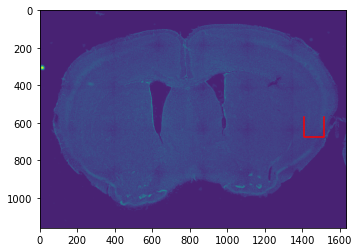

In [13]:
f, ax = plt.subplots()
ax.imshow(im)
try:
    ax.plot(roi["x"], roi["y"], color="red")
except KeyError:
    xy = get_roi_coords(roidata[roi_to_examine], scale_factor=1)
    ax.plot([y for x,y in xy], [x for x,y in xy], color="red")


In [32]:
scale_factor = 4
roi_min_x, roi_max_x = np.min(roi["x"])*scale_factor, np.max(roi["x"])*scale_factor
roi_min_y, roi_max_y = np.min(roi["y"])*scale_factor, np.max(roi["y"])*scale_factor

In [33]:
image1_c1 = imread(FOLDER / "hires" / "chan1" / "FT102_1A_{}.png".format(section))
image2_c1 = imread(FOLDER / "hires" / "chan1" / "FT102_1A_{}_cp_masks.png".format(section))

image1_c2 = imread(FOLDER / "hires" / "chan2" / "FT102_1A_{}.png".format(section))
image2_c2 = imread(FOLDER / "hires" / "chan2" / "FT102_1A_{}_cp_masks.png".format(section))

In [34]:
def normalize_image(image):
    
    normed_im = image/np.max(image) * 255
    
    return np.clip(normed_im, 0, 255)

im1_c1_small = image1_c1[roi_min_y:roi_max_y, roi_min_x:roi_max_x]
im2_c1_small = image2_c1[roi_min_y:roi_max_y, roi_min_x:roi_max_x]

im1_c2_small = image1_c2[roi_min_y:roi_max_y, roi_min_x:roi_max_x]
im2_c2_small = image2_c2[roi_min_y:roi_max_y, roi_min_x:roi_max_x]

In [35]:
stackview.curtain(normalize_image(im1_c1_small), im2_c1_small, continuous_update=True, zoom_factor=1, alpha=0.9)

In [36]:
stackview.curtain(normalize_image(im1_c2_small), im2_c2_small, continuous_update=True, zoom_factor=1, alpha=0.9)

In [105]:
# need to add this code to ROI counting script to avoid duplicates
# ideally find a way to "fix" ROI zip file to remove duplicates

import pandas as pd
df = pd.DataFrame.from_dict(roidata, orient="index")
len(df.drop_duplicates(subset="x"))

In [17]:

image1 = imread(FOLDER / "hires" / "chan2" / "FT112_1A_s000.png")
image2 = imread(FOLDER / "hires" / "chan2" / "FT112_1A_s000_cp_masks.png")

C:\Users\jmc010\AppData\Local\miniconda3\envs\fosquant\Lib\site-packages\imageio\plugins\pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


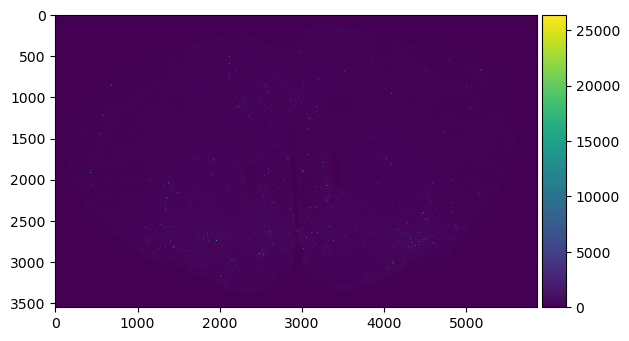

In [32]:
imshow(image1)

In [23]:
im1_small = image1[2000:2250, 2000:2250]
im2_small = image2[2000:2250, 2000:2250]

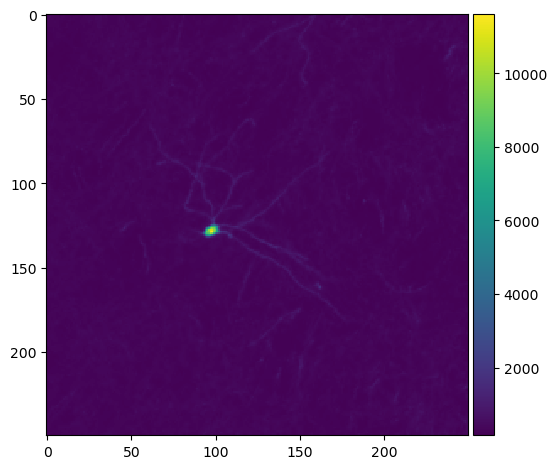

In [28]:
imshow(im1_small)

In [25]:
imagestack = np.concatenate([im1_small, im2_small])

In [26]:
stackview.curtain(im1_small, im2_small, continuous_update=True)

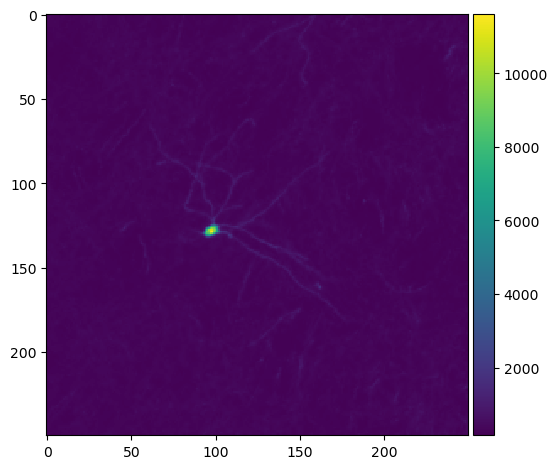

In [27]:
imshow(im1_small)

In [10]:
from run_roi_count import get_roi_coords

In [17]:
roi_to_examine = 's005_insula_30'
roi_to_examine = 's005_insula_31'
# roi_to_examine = 's005_caudate_put_28'# 

roi = roidata[roi_to_examine]
section = roi_to_examine.split("_")[0]

(4640, 6544)
[(2780, 560), (3236, 560), (3236, 972), (2780, 972)]


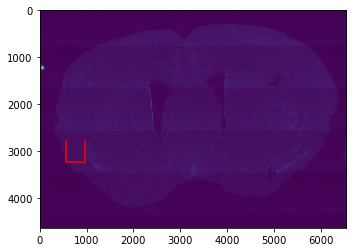

In [18]:
im = imread(FOLDER / "hires" / "chan1" / "FT102_1A_{}.png".format(section))
print(im.shape)

f, ax = plt.subplots()
ax.imshow(im)
xy = get_roi_coords(roidata[roi_to_examine], scale_factor=4)
print(xy)
ax.plot([y for x,y in xy], [x for x,y in xy], color="red")


(1160, 1636)
[(695, 140), (809, 140), (809, 243), (695, 243)]


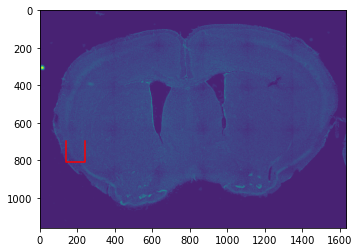

In [19]:
im = imread(FOLDER / "lowres" / lowresimages[0])
print(im.shape)

f, ax = plt.subplots()
ax.imshow(im)
xy = get_roi_coords(roidata[roi_to_examine], scale_factor=1)
print(xy)
ax.plot([y for x,y in xy], [x for x,y in xy], color="red")

In [20]:
from skimage.draw import polygon2mask

def count_neurons(im, roi_coords, verbose=False):
    
    mask = polygon2mask(im.shape, roi_coords)
    masked_image = im * mask
    
    ncells = len(np.unique(masked_image)) - 1

    if verbose: print("The number of neurons is", ncells)
    
    return ncells, masked_image

count_neurons(im, xy, verbose=True)

The number of neurons is 53


(53,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

11960

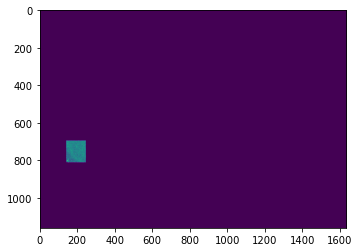

In [21]:
mask = polygon2mask(im.shape, xy)
masked_image = im * mask

f, ax = plt.subplots()
ax.imshow(masked_image)

np.sum(polygon2mask(im.shape, xy))

In [29]:
im.shape

(1160, 1636)

In [38]:
np.sum(polygon2mask((10,10), [(2,3), (6,3), (6,4), (2,4)]))

10

In [39]:
xy

[(1410, 568), (1518, 568), (1518, 675), (1410, 675)]

In [40]:
im.shape

(1160, 1636)